*LAB 14* - week 8,NLP

1. While the dependency visualization provided by displacy is useful for understanding the grammatical structure of sentences, we could explore more interactive visualizations like word clouds, sentiment heatmaps, or topic modeling visualizations to convey insights more effectively.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 kB 2.5 MB/s eta 0:00:00 0:00:01


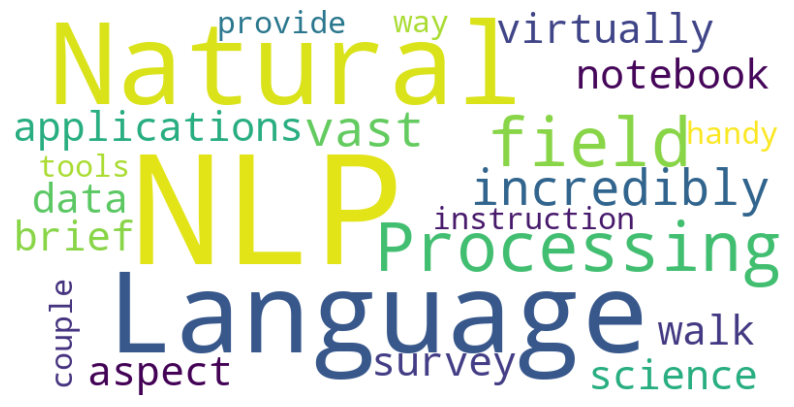

In [6]:
!pip install wordcloud

import pandas as pd
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nlp = spacy.load('en_core_web_sm')

intro = '''The Natural Language Processing (NLP) field is incredibly vast,
and it has applications in virtually every aspect of data science.
In this notebook, we will walk through a **very brief** survey of NLP,
and provide some instruction on a couple handy tools along the way.
'''

doc = nlp(intro)
tokens = [token.text for token in doc if not token.is_stop and token.is_alpha]

# Creating a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

2. When analyzing large datasets, disabling unnecessary components can significantly improve processing efficiency.
Tokenizing documents involves making choices about which linguistic attributes are relevant to the analysis and excluding unnecessary ones.
Lemmatization ensures that words are reduced to their base form, aiding in standardization and reducing token variations.
The resulting tokenized documents can be used for various text analysis tasks like sentiment analysis, topic modeling, or keyword extraction.

In [4]:
df_coffee = pd.read_csv('/Users/ramyaamudapakula/Desktop/Sem1/Intro to Informatics/Projects/I501 labs and pair problems/lab_8/lab_08-1/data/coffee_analysis.csv')

df_coffee.drop_duplicates(subset='desc_1', inplace=True)
print(df_coffee.shape)

print(df_coffee['desc_1'].sample().iloc[0])

nlp = spacy.load('en_core_web_sm')
docs = nlp.pipe(df_coffee['desc_1'], disable=['ner', 'parser', 'textcat'])

df_coffee['spacy_doc'] = list(docs)

def tokenizer(doc, join_tokens=False):
    tokens = [w.lemma_.lower() for w in doc if
              (not w.is_stop
               and not w.is_punct
               and not w.like_num) \
              or (w.lemma_ == 'not')]

    if join_tokens:
        return ' '.join(tokens)
    else:
        return tokens

df_coffee['docs_clean'] = df_coffee['spacy_doc'].apply(tokenizer)

print(df_coffee['desc_1'].iloc[5])
print(df_coffee['docs_clean'].iloc[5])

(2092, 12)
Crisply sweet-toned. Cocoa nib, hazelnut, dried apricot, magnolia, cedar in aroma and cup. Deeply sweet structure with balanced acidity; full, syrupy mouthfeel. Cocoa-driven finish supported by cedar and hazelnut.
Delicate, richly and sweetly tart. Dried hibiscus, fine musk, almond, sandalwood, raspberry in aroma and cup. Fruit-toned, deeply sweet structure with gently-expressed acidity; buoyant, satiny-smooth mouthfeel. The crisp, flavor-saturated finish is characterized by sweet-tart fruit and floral tones (raspberry, hibiscus).
['delicate', 'richly', 'sweetly', 'tart', 'dry', 'hibiscus', 'fine', 'musk', 'almond', 'sandalwood', 'raspberry', 'aroma', 'cup', 'fruit', 'tone', 'deeply', 'sweet', 'structure', 'gently', 'express', 'acidity', 'buoyant', 'satiny', 'smooth', 'mouthfeel', 'crisp', 'flavor', 'saturate', 'finish', 'characterize', 'sweet', 'tart', 'fruit', 'floral', 'tone', 'raspberry', 'hibiscus']


3. We can leverage techniques like filtering stop words, adjusting maximum document frequency thresholds, and experimenting with different ngram ranges to improve the quality of vector representations.
   
While the provided heatmap(in week8 lab notebook) visualizations offer insights into the frequency of terms in the document-term matrix, Caffeine Insights could explore more interactive visualizations like word clouds, dimensionality reduction techniques etc

Also, biases may arise from the choice of words used in consumer reviews, cultural influences on taste preferences, or the demographic makeup of reviewers. Caffeine Insights must address biases by ensuring diversity in the dataset, validating the representativeness of the sample, and considering the context in which reviews are generated.


4. Vader Sentiment Analysis
   
The challenge involves defining a sentiment analysis model that accurately interprets sentiment expressed in social media posts. This includes understanding the nuances of language used in online conversations, handling sarcasm, slang, and emoticons, and providing sentiment ratings consistent with human judgment.

We can improve the code by leveraging techniques like cross-validation, ensemble methods, or fine-tuning model parameters to improve the accuracy and generalizability of sentiment analysis predictions.

While the provided heatmap visualization offers insights into sentiment scores for each sentence, we could explore additional visualizations like trend analysis over time, or word clouds of most frequently occurring positive and negative terms to provide a more comprehensive understanding of sentiment trends on social media.

Again, biases may arise from the demographics of social media users, cultural differences in language usage, or algorithmic biases in the sentiment analysis model. We must address biases by ensuring diverse representation in the dataset, validating the model's performance across different user groups, and conducting bias audits to identify and mitigate potential biases.